# git管理 TODO（現在使ってない）

In [49]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.6 MB/s eta 0:00:00


# Flowchart-Detection


In [ ]:
!pip freeze

In [ ]:
# 関連ライブラリのインストール
!pip install cairosvg
!apt install tree
!pip install xmltodict

In [2]:
!pwd

/content


In [3]:
!nvidia-smi

Sat Nov 30 05:46:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# g-driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/programs/flow-chart-detection/

ckpt  data  output


In [6]:
# datasetへのpathを設定
PATH_TO_FCDetection = '/content/drive/MyDrive/programs/flow-chart-detection'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (54.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [7]:
!tree /content/drive/MyDrive/programs/flow-chart-detection

/content/drive/MyDrive/programs/flow-chart-detection
├── ckpt
│   └── fd_model.pth
├── data
│   ├── flowchart-example001.webp
│   ├── flowchart-example001.xml
│   ├── flowchart-example002.webp
│   ├── flowchart-example002.xml
│   ├── flowchart-example003.png
│   ├── flowchart-example003.xml
│   ├── flowchart-example004.png
│   ├── flowchart-example004.xml
│   ├── flowchart-example006.png
│   ├── flowchart-example006.xml
│   ├── flowchart-example007.png
│   ├── flowchart-example007.xml
│   ├── flowchart-example008.jpeg
│   ├── flowchart-example008.xml
│   ├── flowchart-example009.jpg
│   ├── flowchart-example009.xml
│   ├── flowchart-example012.png
│   ├── flowchart-example012.xml
│   ├── flowchart-example013.png
│   ├── flowchart-example013.xml
│   ├── flowchart-example014.gif
│   ├── flowchart-example014.xml
│   ├── flowchart-example015.png
│   ├── flowchart-example015.xml
│   ├── flowchart-example016.png
│   ├── flowchart-example016.xml
│   ├── flowchart-example017.png
│   ├── flowch

# 画像の読み込みと中身確認

In [9]:
# ライブラリのインストール
from PIL import Image
import cairosvg
from io import BytesIO
import cv2
from IPython.display import display
import numpy as np
import os
import glob

In [ ]:
#画像の読み込み
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
print(f"files: {files}")
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    continue
  if path1.rsplit('.', 1)[1] == 'svg':
    img = cairosvg.svg2png(url=path1)
    img = Image.open(BytesIO(img))
  else:
    img = Image.open(path1)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # img = cv2.imread(path1)
  display(img)

## アノテーションの読み込み

In [11]:
import xml.etree.ElementTree as ET
for path1 in files:
  if path1.rsplit('.', 1)[1] != 'xml':
    continue
  tree = ET.parse(path1)
  root = tree.getroot()
  for child in root:
    print(child.tag, child.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {

## 画像にアノテーションを描画する

In [ ]:
from PIL import ImageDraw
import xmltodict
# xmlのみ収集
xml_files = []
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    xml_files.append(path1)
print('xml_files', xml_files)

# xmlファイルから対応する画像ファイルを読み込む
for xml_path1 in xml_files:
  # get image path... png, jpg, jpeg, ...etc
  # img_path_base = xml_path1.rsplit('.', 1)[0]
  # files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', img_path_base + '.*'))
  # img_file_name = None
  # for path1 in files:
  #   if path1.rsplit('.', 1)[1] != 'xml':
  #     img_file_name = path1

  with open(xml_path1, 'r') as f:
      xml_string = f.read()
  xml_dict = xmltodict.parse(xml_string)

  colors = {'terminator':"red",
            'process':"green",
            'decision':"#808080",
            'arrow':"#FFA500",
            'text':"blue",
            'start_point':"#800080",
            'data':"grey",
            'connection':"black",
            'end_point':"yellow"}

  anno_dict = xml_dict['annotation']
  # open image
  filename = anno_dict['filename']
  file_path = os.path.join(PATH_TO_FCDetection, 'data', filename)
  print("file_path, ", file_path)
  # if filename.rsplit('.', 1)[1] == 'gif':
  img = Image.open(file_path).convert('RGB')
  # else:
  #   img = Image.open(file_path)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # ImageDrawオブジェクトの作成
  draw = ImageDraw.Draw(img)

  for key, value in anno_dict.items():
    if key == 'object':
      for object1 in value:
        print("object1, ", object1)
        xmin = int(object1['bndbox']['xmin'])
        ymin = int(object1['bndbox']['ymin'])
        xmax = int(object1['bndbox']['xmax'])
        ymax = int(object1['bndbox']['ymax'])

        # 矩形の描画
        # (x1, y1)は左上の座標、(x2, y2)は右下の座標
        print("")
        draw.rectangle((xmin, ymin, xmax, ymax), outline=colors[object1['name']],
                       width=3) # fill=colors[object1['name']],

  # 画像の保存
  # img.save('rectangle.png')
  display(img)



# モデルの構築と学習

## importするtorch関係ライブラリ

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.models.detection import fcos_resnet50_fpn
from torchvision.models.detection.fcos import FCOSHead
import cv2
import numpy as np
from PIL import Image

## annotationの前処理

In [27]:
LABELs = {'text':0,
          'arrow':1,
          'connection':2,
          'data':3,
          'decision':4,
          'process':5,
          'terminator':6}

def preprocess_annotation(root_dir=PATH_TO_FCDetection):
  xml_files = glob.glob(os.path.join(root_dir, 'data', '*.xml'))
  print('xml_files', xml_files)
  annotations = []
  for xml_path1 in xml_files:
    with open(xml_path1, 'r') as f:
        xml_string = f.read()
    xml_dict = xmltodict.parse(xml_string)
    anno_dict = xml_dict['annotation']
    boxes = []
    labels = []
    for key, value in anno_dict.items():
      if key == 'object':
        for object1 in value:
          xmin = int(object1['bndbox']['xmin'])
          ymin = int(object1['bndbox']['ymin'])
          xmax = int(object1['bndbox']['xmax'])
          ymax = int(object1['bndbox']['ymax'])
          boxes.append([xmin, ymin, xmax, ymax])
          labels.append(LABELs[object1['name']])
    # img_path = os.path.join(root_dir, 'data', anno_dict['filename'])
    annotations.append({"image": anno_dict['filename'],
                        "boxes": boxes,
                        "labels": labels})
  return annotations

annos = preprocess_annotation()
print(f"len(annos):{len(annos)}")
print(f"annos[0]['filename']:{annos[0]['image']}")
print(f"annos[0]['boxes']:{annos[0]['boxes']}")
print(f"annos[0]['labels']:{annos[0]['labels']}")

xml_files ['/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example001.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example002.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example003.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example004.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example007.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example008.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example009.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example013.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example014.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example015.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example016.xml', '/content/drive/MyDrive/programs/flow-chart

In [28]:
# transform
def get_transforms():
    return T.Compose([
        # TODO data augmentation
        T.ToTensor(),
        T.Resize((512, 512)),  # サイズを統一
        # TODO normalization
    ])

## datasetクラス

In [32]:
# 1. dataset
class CustomObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, image_dir, transforms=None, phase='train'):
        """
        :param annotations: アノテーション情報（リスト形式）[{"image": "path", "boxes": [[x1, y1, x2, y2], ...], "labels": [1, 2, ...]}, ...]
        :param image_dir: 画像ディレクトリパス
        :param transforms: 画像に適用するtorchvision.transforms
        """
        annotations = preprocess_annotation(root_dir)
        if phase == 'train':
            self.annotations = annotations[:int(len(annotations) * 0.85)]
        elif phase == 'test':
            self.annotations = annotations[int(len(annotations) * 0.85):]
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        annotation = self.annotations[idx]
        image_path = f"{self.image_dir}/{annotation['image']}"
        image = Image.open(image_path).convert("RGB")

        boxes = torch.tensor(annotation["boxes"], dtype=torch.float32)
        labels = torch.tensor(annotation["labels"], dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        if self.transforms:
            image = self.transforms(image)

        return image, target
image_dir = os.path.join(PATH_TO_FCDetection, 'data')
dataset_train = CustomObjectDetectionDataset(PATH_TO_FCDetection, image_dir, transforms=get_transforms(), phase='train')
dataset_test = CustomObjectDetectionDataset(PATH_TO_FCDetection, image_dir, transforms=get_transforms(), phase='test')

xml_files ['/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example001.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example002.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example003.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example004.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example007.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example008.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example009.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example013.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example014.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example015.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example016.xml', '/content/drive/MyDrive/programs/flow-chart

## dataloader
trainとtestの２つ作成

In [33]:
dataloader_train = DataLoader(dataset_train, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
dataloader_test = DataLoader(dataset_test, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [44]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

num_classes = len(LABELs)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 3. モデル
model = fasterrcnn_resnet50_fpn(pretrained=True) # fcosモデルを使用
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
# TODO headの部分を変える
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## optimizer, schedulerの定義

In [45]:
# 4. Optimizer と Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

## 1epochの学習

In [46]:
def train_one_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    loss_c, loss_b, loss_o, loss_r = 0,0,0,0
    """
    'loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg'
    """
    # total_pred = []
    # total_target = []
    for images, targets in dataloader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # TODO 出力を要確認
        # print("loss_dict, ", loss_dict)
        # print("type(loss_dict), ", type(loss_dict))

        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
        loss_c += loss_dict['loss_classifier'].item()
        loss_b += loss_dict['loss_box_reg'].item()
        loss_o += loss_dict['loss_objectness'].item()
        loss_r += loss_dict['loss_rpn_box_reg'].item()
        # predicts = outputs['labels']
        # targets = targets['labels
        # total_pred.append(predicts)
        # total_target.append(targets)

    return total_loss / len(dataloader), loss_c / len(dataloader), loss_b / len(dataloader), loss_o / len(dataloader), loss_r / len(dataloader)

## 学習のメイン処理

In [47]:
# 7. メイン処理
num_epochs = 20
loss_dict = {'loss_total':[],
             'loss_classifier':[],
             'loss_boundingbox':[],
             'loss_object':[],
             'loss_rpn':[]}

for epoch in range(num_epochs):
    loss, loss_c, loss_b, loss_o, loss_r = train_one_epoch(model, dataloader_train, optimizer, device)
    loss_dict['loss_total'].append(loss)
    loss_dict['loss_classifier'].append(loss_c)
    loss_dict['loss_boundingbox'].append(loss_b)
    loss_dict['loss_object'].append(loss_o)
    loss_dict['loss_rpn'].append(loss_r)
    lr_scheduler.step()
    # metrics = get_metrics(total_pred, total_target)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
    print(f"loss_classifier: {loss_c:.4f}, loss_boundingbox: {loss_b:.4f}, loss_object: {loss_o:.4f}, loss_rpn: {loss_r:.4f}")

# 8. モデルの保存
torch.save(model.state_dict(), os.path.join(PATH_TO_FCDetection, "ckpt/fcos_model.pth"))



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20, Loss: 8.7713
loss_classifier: 0.5954, loss_boundingbox: 0.1482, loss_object: 2.0193, loss_rpn: 6.0084
Epoch 2/20, Loss: 6.9304
loss_classifier: 0.4649, loss_boundingbox: 0.2286, loss_object: 0.6337, loss_rpn: 5.6032
Epoch 3/20, Loss: 6.7530
loss_classifier: 0.4900, loss_boundingbox: 0.2571, loss_object: 0.6817, loss_rpn: 5.3243
Epoch 4/20, Loss: 6.4430
loss_classifier: 0.3801, loss_boundingbox: 0.1644, loss_object: 0.6409, loss_rpn: 5.2577
Epoch 5/20, Loss: 6.8325
loss_classifier: 0.4013, loss_boundingbox: 0.1988, loss_object: 0.6006, loss_rpn: 5.6318
Epoch 6/20, Loss: 6.8313
loss_classifier: 0.4325, loss_boundingbox: 0.2342, loss_object: 0.5927, loss_rpn: 5.5719
Epoch 7/20, Loss: 6.2423
loss_classifier: 0.4368, loss_boundingbox: 0.2434, loss_object: 0.5939, loss_rpn: 4.9682
Epoch 8/20, Loss: 6.5898
loss_classifier: 0.4343, loss_boundingbox: 0.2427, loss_object: 0.5907, loss_rpn: 5.3221
Epoch 9/20, Loss: 6.6063
loss_classifier: 0.4339, loss_boundingbox: 0.2420, loss_object:

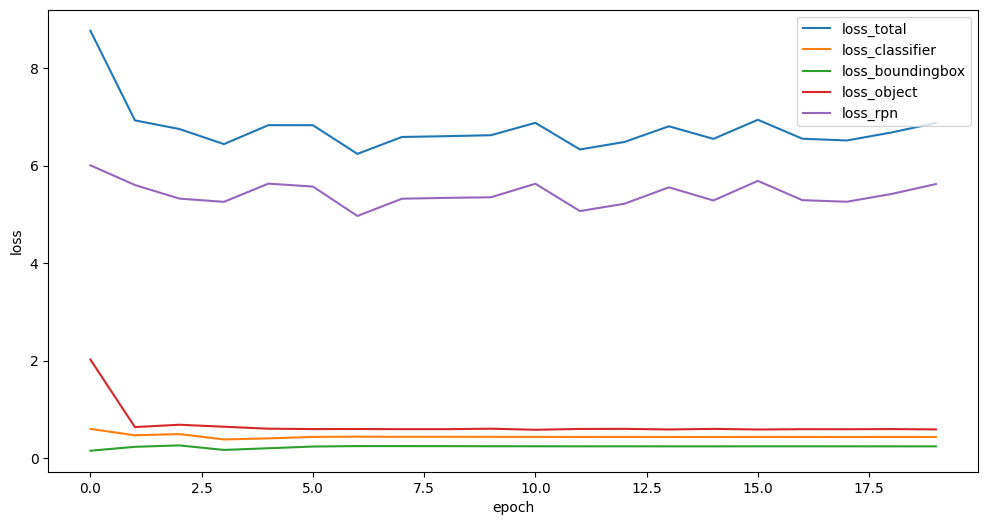

In [48]:
## 学習曲線
import matplotlib.pyplot as plt
import numpy as np

"""
loss_dict = {'loss_total':[],
             'loss_classifier':[],
             'loss_boundingbox':[],
             'loss_object':[],
             'loss_rpn':[]}
"""

# プロット
x = np.arange(len(loss_dict['loss_total']))
plt.figure(figsize=(12, 6))
for key, value in loss_dict.items():
  plt.plot(x, value, label=key)

# 4.5.3 軸名の設定
plt.xlabel('epoch')
plt.ylabel('loss')

# 4.5.4 凡例の表示
plt.legend()

# 4.5.5 プロット表示
plt.show()


## 学習済みモデルを用いた画像の可視化と保存

